In [124]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
type(df)

numpy.ndarray

In [108]:
X = df[:, 2]
y = df[:, -1]

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape
X_train = np.c_[np.ones((len(X_train), 1), dtype='int'), X_train]
X_test = np.c_[np.ones((len(X_test), 1), dtype='int'), X_test]
X_train

array([[1.        , 0.44301924],
       [1.        , 0.84015787],
       [1.        , 0.29501727],
       [1.        , 0.35668476],
       [1.        , 0.06758757],
       [1.        , 0.34188456],
       [1.        , 0.55895412],
       [1.        , 0.42427232],
       [1.        , 0.4647262 ],
       [1.        , 0.5772077 ],
       [1.        , 0.36803157],
       [1.        , 0.44153922],
       [1.        , 0.33596448],
       [1.        , 0.53478046],
       [1.        , 0.71336951],
       [1.        , 0.41489887],
       [1.        , 0.2274297 ],
       [1.        , 0.71879625],
       [1.        , 0.50222003],
       [1.        , 0.3325111 ],
       [1.        , 0.36063148],
       [1.        , 0.17316231],
       [1.        , 0.3325111 ],
       [1.        , 0.49531327],
       [1.        , 0.52540701],
       [1.        , 0.28712383],
       [1.        , 0.62259497],
       [1.        , 0.3547114 ],
       [1.        , 0.3325111 ],
       [1.        , 0.26048347],
       [1.

In [206]:
def cost_func(theta, X, y):
    m = len(X)
    pred = X.dot(theta)
    cost = (1/m) * np.sum(np.square(pred - y))
    return cost**(1/2)

In [207]:
def gradientDescent(X_train, X_test, y_train, y_test, alpha, epochs):
    m = len(y_train)
    theta = np.zeros(X_train.shape[1]).T
    print(theta)
    rmse_train = np.empty(epochs)
    rmse_test = np.empty(epochs)
    it = np.arange(epochs)
    for i in range(epochs):
        pred = np.dot(X_train, theta)
        theta = theta - (1 / m) * alpha * (X_train.T.dot((pred - y_train)))
        rmse_train[i] = cost_func(theta, X_train, y_train)
        rmse_test[i] = cost_func(theta, X_test, y_test)
    plt.plot(it, rmse_train, c='red', label='Training RMSE')
    plt.plot(it, rmse_test, c='green', label='Testing RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    print(theta)
    return theta, rmse_train, rmse_test

[0. 0.]


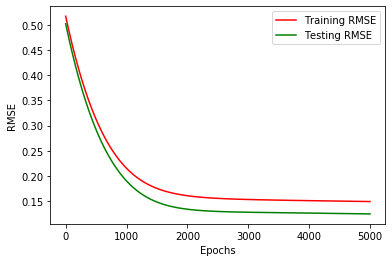

[0.37300846 0.26287025]


In [208]:
theta, rmse_train, rmse_test = gradientDescent(X_train, X_test, y_train, y_test, 0.001, 5000)

In [209]:
X_train = X_train[:, 1]


In [197]:
theta, rmse_train

(array([0.36924228, 0.25919214]),
 array([0.25991025, 0.25933365, 0.25875843, ..., 0.01874678, 0.01874632,
        0.01874586]))

In [ ]:
from numpy.linalg import pinv
X = y @ pinv(X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


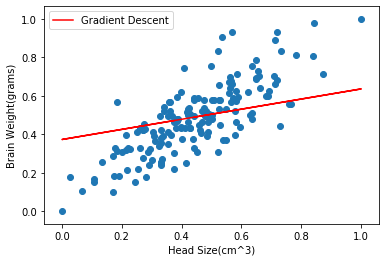

In [210]:
plt.scatter(X_train, y_train)
y_pred = theta[0] + theta[1] * X_train
plt.plot(X_train, y_pred, color='r', label='Gradient Descent', c='red')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()